# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random
import keras

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

C:\Users\Maritza\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

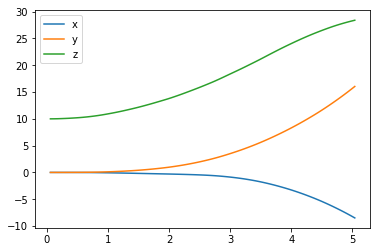

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

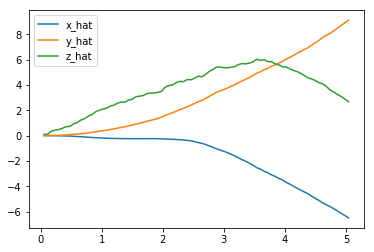

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

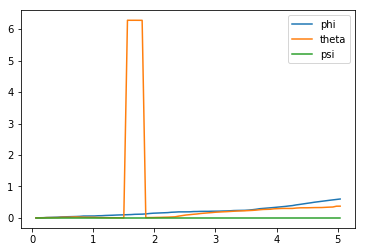

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

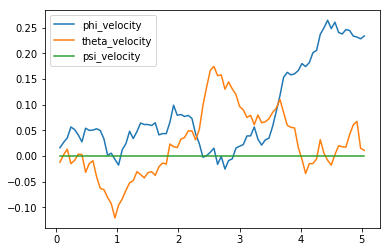

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

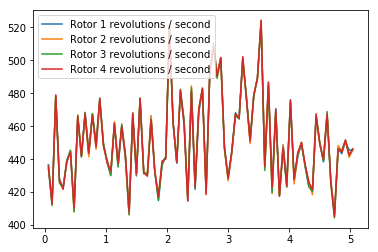

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-8.48886824 16.04731998 28.40587593  0.60104761  0.37345563  0.        ]
[-6.49095841  9.09961435  2.67822119]
[0.2341385  0.01086053 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -2.237 (best =   0.356), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## TODO: Train your agent here.
import pandas as pd
from agents.actor import Actor 
from agents.ddpg import DDPG
import sys
import math 

from takeoff_task import takeoff_task 

num_episodes = 1000
init_pose = np.array([0., 0., 0., 0., 0., 0.])

task = takeoff_task(init_pose=init_pose)
agent = DDPG(task) 
best_reward = -float("inf")
best_episode_reward = -float("inf")
print('initial position: ', task.sim.pose)
print('target position: ', task.target_pos)

cumulative_reward = 0.

labels = ['episode', 'time', 'reward', 'cumulative_reward', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() 
    cumulative_reward = 0.
    best_episode_reward = 0. 
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        cumulative_reward += reward
        state = next_state
        
        if reward > best_episode_reward:
            best_episode_reward = reward
        if done:
            if best_episode_reward > best_reward:
                best_reward = best_episode_reward
            to_write = [i_episode] + [task.sim.time] + [reward] + [cumulative_reward] +  list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            print("\rEpisode = {:4d} Score = {:4f} Highest Score = {:4f} \n".format(i_episode, best_episode_reward, best_reward), end="")   # [debug]
            print(task.sim.pose, "\n")
            
            break
    sys.stdout.flush()

initial position:  [0. 0. 0. 0. 0. 0.]
target position:  [ 0. 50.  0.]
Episode =    1 Score = 41000.000044 Highest Score = 41000.000044 
[ 0.01899733 -0.0169422   0.          0.90121866  3.03598055  0.        ] 

Episode =    2 Score = 41000.013163 Highest Score = 41000.013163 
[-0.02801378 -0.01390189  0.          3.93554589  1.38088522  0.        ] 

Episode =    3 Score = 41088.198753 Highest Score = 41088.198753 
[-3.48792150e-03  1.52114139e+00  0.00000000e+00  5.15031877e+00
  5.54638029e+00  0.00000000e+00] 

Episode =    4 Score = 41083.760106 Highest Score = 41088.198753 
[-0.55111323  1.44171766  0.          0.76354144  1.35738221  0.        ] 

Episode =    5 Score = 40999.999972 Highest Score = 41088.198753 
[-0.16185174 -0.06172488  0.          3.18950528  1.19431305  0.        ] 

Episode =    6 Score = 41009.842599 Highest Score = 41088.198753 
[-0.04403808  0.22249644  0.          0.15353338  1.42179514  0.        ] 

Episode =    7 Score = 41005.953879 Highest Score = 

Episode =   57 Score = 41000.000318 Highest Score = 41113.743325 
[-0.13176629 -0.03973903  0.          2.51731022  4.80091768  0.        ] 

Episode =   58 Score = 41001.208880 Highest Score = 41113.743325 
[ 0.0436251  -0.01090522  0.          0.09678803  5.8394367   0.        ] 

Episode =   59 Score = 41000.001036 Highest Score = 41113.743325 
[-1.42714771e-02  1.78904043e-03  0.00000000e+00  3.43659541e+00
  4.23962036e+00  0.00000000e+00] 

Episode =   60 Score = 41000.000147 Highest Score = 41113.743325 
[-0.02706339 -0.01486509  0.          3.86145671  6.13475033  0.        ] 

Episode =   61 Score = 41000.002035 Highest Score = 41113.743325 
[-0.12424953 -0.03959174  0.          2.68580744  5.06498548  0.        ] 

Episode =   62 Score = 41000.000869 Highest Score = 41113.743325 
[ 0.01959998 -0.0174018   0.          0.90112774  3.30482159  0.        ] 

Episode =   63 Score = 41009.357936 Highest Score = 41113.743325 
[-0.18728271  0.18666985  0.          4.18964407  1.96508

Episode =  113 Score = 40999.999987 Highest Score = 41113.743325 
[ 0.1578102  -0.04987935  0.          0.39376942  0.41121975  0.        ] 

Episode =  114 Score = 41082.681719 Highest Score = 41113.743325 
[0.14905723 1.39542863 0.         4.89652817 3.36228257 0.        ] 

Episode =  115 Score = 40999.999937 Highest Score = 41113.743325 
[-0.03126661 -0.14091889  0.          2.4505485   1.14761716  0.        ] 

Episode =  116 Score = 40999.999942 Highest Score = 41113.743325 
[-0.04102874 -0.13800096  0.          2.50652836  1.23174405  0.        ] 

Episode =  117 Score = 41000.317820 Highest Score = 41113.743325 
[0.01297307 0.01385297 0.         5.65197184 1.40606941 0.        ] 

Episode =  118 Score = 41085.881323 Highest Score = 41113.743325 
[0.02299564 1.51237713 0.         2.40488657 5.96155328 0.        ] 

Episode =  119 Score = 41083.302587 Highest Score = 41113.743325 
[-0.58541016  1.43699048  0.          1.50099333  1.54541633  0.        ] 

Episode =  120 Score = 4

Episode =  170 Score = 40999.561520 Highest Score = 41237.074149 
[-0.04441191 -0.00587007  0.          2.20039522  3.33834091  0.        ] 

Episode =  171 Score = 40999.658483 Highest Score = 41237.074149 
[-0.04209924 -0.00893935  0.          2.46867661  5.06974949  0.        ] 

Episode =  172 Score = 40999.656947 Highest Score = 41237.074149 
[-0.02724339 -0.01165515  0.          2.94029226  1.03322963  0.        ] 

Episode =  173 Score = 40999.701480 Highest Score = 41237.074149 
[-0.02189238 -0.00791887  0.          3.2362941   3.59996023  0.        ] 

Episode =  174 Score = 40999.755387 Highest Score = 41237.074149 
[-0.01617131 -0.00626272  0.          3.51078176  0.39864485  0.        ] 

Episode =  175 Score = 40999.761082 Highest Score = 41237.074149 
[-0.0094383  -0.00719131  0.          3.79322407  3.54418684  0.        ] 

Episode =  176 Score = 40999.767758 Highest Score = 41237.074149 
[-3.78009774e-03 -5.75351780e-03  0.00000000e+00  4.16258946e+00
  9.85268447e-01 

Episode =  227 Score = 41196.035704 Highest Score = 49884.147605 
[ 14.21492908   2.51648602 136.88596632   6.23596748   5.27698132
   0.        ] 

Episode =  228 Score = 41000.176134 Highest Score = 49884.147605 
[ 24.8711138  -14.12894484 155.30522794   5.71195483   5.12978528
   0.        ] 

Episode =  229 Score = 41047.708842 Highest Score = 49884.147605 
[-58.76412048  -1.44307557 113.80306917   5.69444822   1.51349755
   0.        ] 

Episode =  230 Score = 41009.416281 Highest Score = 49884.147605 
[  8.36486773 -23.15315257 129.2832343    4.81977105   6.1813029
   0.        ] 

Episode =  231 Score = 40999.999579 Highest Score = 49884.147605 
[ 31.49336327 -45.26845238 126.34824436   4.58473267   4.67642488
   0.        ] 

Episode =  232 Score = 41614.654958 Highest Score = 49884.147605 
[ 16.70568501   9.3555724  135.28379463   0.54760125   5.56180893
   0.        ] 

Episode =  233 Score = 40999.999852 Highest Score = 49884.147605 
[ 10.72450406 -27.83771541 130.05360568  

Episode =  282 Score = 40999.999495 Highest Score = 51500.000000 
[-55.72547153 -22.00948367 113.19556403   5.08151896   1.43774583
   0.        ] 

Episode =  283 Score = 41048.676720 Highest Score = 51500.000000 
[-31.25876143   0.68830845 127.6978683    6.21991113   1.06829424
   0.        ] 

Episode =  284 Score = 41154.606224 Highest Score = 51500.000000 
[ 11.32834334   2.80572774 141.01097396   1.19224261   0.26470798
   0.        ] 

Episode =  285 Score = 41000.080089 Highest Score = 51500.000000 
[-17.44554804 -32.17276582 127.21372954   5.11554447   5.96066186
   0.        ] 

Episode =  286 Score = 41134.711688 Highest Score = 51500.000000 
[ 150.         -150.          300.            5.52877448    4.42467677
    0.        ] 

Episode =  287 Score = 42646.372516 Highest Score = 51500.000000 
[-38.4185501   25.19644504 185.18627463   1.73824364   1.01401179
   0.        ] 

Episode =  288 Score = 41077.792893 Highest Score = 51500.000000 
[ 31.3949905  -16.09499521 132.312

Episode =  337 Score = 41044.292986 Highest Score = 51500.000000 
[ -2.68412579  -5.40198554 132.87918297   5.74683436   0.27596072
   0.        ] 

Episode =  338 Score = 40999.999495 Highest Score = 51500.000000 
[-24.18349392  -8.8530019  129.47853892   5.44765888   1.32658714
   0.        ] 

Episode =  339 Score = 42396.471123 Highest Score = 51500.000000 
[-3.05728491e+01  2.11660452e+01  1.58136054e+02  1.49608872e+00
  1.19305193e-01  0.00000000e+00] 

Episode =  340 Score = 41000.699888 Highest Score = 51500.000000 
[ 16.90846339 -20.93419603 133.95823533   4.96752239   5.29511812
   0.        ] 

Episode =  341 Score = 41000.856385 Highest Score = 51500.000000 
[ -1.00497428 -17.39825342 131.37350499   5.2148787    0.26809817
   0.        ] 

Episode =  342 Score = 41921.479256 Highest Score = 51500.000000 
[1.06184540e+01 1.43284831e+01 1.50576524e+02 1.49125392e-01
 4.68966876e+00 0.00000000e+00] 

Episode =  343 Score = 42578.563772 Highest Score = 51500.000000 
[-30.69439

Episode =  392 Score = 41000.015914 Highest Score = 51500.000000 
[-34.44411698 -15.67545971 126.5649587    0.69767228   1.77783696
   0.        ] 

Episode =  393 Score = 41016.218279 Highest Score = 51500.000000 
[ 40.12196941 -48.2413165  129.58393862   4.61650034   4.40679095
   0.        ] 

Episode =  394 Score = 41925.592782 Highest Score = 51500.000000 
[ 22.35370514  13.7187093  154.7957831    1.34827334   5.28845837
   0.        ] 

Episode =  395 Score = 40999.999883 Highest Score = 51500.000000 
[ 150.         -150.          300.            5.61074049    3.52704646
    0.        ] 

Episode =  396 Score = 41022.417920 Highest Score = 51500.000000 
[ 28.49997124   0.49962246 137.40194822   0.61232228   5.42392712
   0.        ] 

Episode =  397 Score = 50257.150355 Highest Score = 51500.000000 
[150.         150.         300.           2.55048898   0.59588168
   0.        ] 

Episode =  398 Score = 41421.050382 Highest Score = 51500.000000 
[ -7.55925419   6.57343114 134.497

Episode =  447 Score = 41007.828932 Highest Score = 51500.000000 
[-25.52043482 -23.59480497 126.58772362   5.54655707   0.83093916
   0.        ] 

Episode =  448 Score = 42003.886009 Highest Score = 51500.000000 
[ 50.18138993  16.70408784 176.16299266   1.20297052   4.26880947
   0.        ] 

Episode =  449 Score = 40999.999873 Highest Score = 51500.000000 
[-51.90180953  -7.82705367 150.26442723   1.66861848   1.5849954
   0.        ] 

Episode =  450 Score = 41721.097435 Highest Score = 51500.000000 
[-56.05253913  10.38515379 123.83324563   1.54037533   1.72785864
   0.        ] 

Episode =  451 Score = 42393.183033 Highest Score = 51500.000000 
[150.         109.77865666 300.           0.49194751   4.02838569
   0.        ] 

Episode =  452 Score = 41000.062893 Highest Score = 51500.000000 
[  1.24371835  -4.0258605  138.25628726   0.83983082   0.63019546
   0.        ] 

Episode =  453 Score = 49930.666733 Highest Score = 51500.000000 
[150.         150.         300.          

Episode =  502 Score = 41000.077797 Highest Score = 51500.000000 
[ 17.00932855 -61.35729112 106.0520169    4.09671893   5.95599922
   0.        ] 

Episode =  503 Score = 41266.471613 Highest Score = 51500.000000 
[-67.1979726    0.78659243  95.6383966    0.66980035   2.91918875
   0.        ] 

Episode =  504 Score = 41000.038459 Highest Score = 51500.000000 
[-47.56105974 -41.84719671 110.67523364   4.80292419   1.89442994
   0.        ] 

Episode =  505 Score = 41000.336152 Highest Score = 51500.000000 
[ 17.46333834  -1.37272563 134.1946709    6.13444061   5.65129082
   0.        ] 

Episode =  506 Score = 43116.896074 Highest Score = 51500.000000 
[ 25.13523147  31.74058979 147.91953083   1.3942868    5.06014016
   0.        ] 

Episode =  507 Score = 41375.540948 Highest Score = 51500.000000 
[-75.82366315  -4.28248047  84.10468419   1.05296013   3.12034428
   0.        ] 

Episode =  508 Score = 43015.757201 Highest Score = 51500.000000 
[-21.71179266  29.7356024  155.03076519 

Episode =  557 Score = 40999.999509 Highest Score = 51500.000000 
[-73.8005807   -9.88779902  86.64037861   5.92324331   3.09177443
   0.        ] 

Episode =  558 Score = 41000.004603 Highest Score = 51500.000000 
[-2.03581829e+01 -1.31581533e+01  1.30252127e+02  5.12589323e-02
  6.42145351e-01  0.00000000e+00] 

Episode =  559 Score = 41005.324917 Highest Score = 51500.000000 
[ 20.25811561 -15.15753694 141.15517615   5.7336806    4.83766699
   0.        ] 

Episode =  560 Score = 40999.999545 Highest Score = 51500.000000 
[-3.83817030e-02 -7.16272815e+01  9.12783967e+01  3.68833578e+00
  5.82813030e-01  0.00000000e+00] 

Episode =  561 Score = 41993.070529 Highest Score = 51500.000000 
[-58.97788108  14.21496733 111.61028316   0.91335424   2.04610392
   0.        ] 

Episode =  562 Score = 41000.001944 Highest Score = 51500.000000 
[-23.78540518 -43.50720909 122.59697836   6.00785511   6.06704382
   0.        ] 

Episode =  563 Score = 40999.999932 Highest Score = 51500.000000 
[ 6.

Episode =  612 Score = 41342.801681 Highest Score = 51500.000000 
[ 24.52064103   5.42329351 144.98001531   0.52647776   5.24835574
   0.        ] 

Episode =  613 Score = 50957.613097 Highest Score = 51500.000000 
[-150.          150.          300.            2.09306128    5.13888649
    0.        ] 

Episode =  614 Score = 41514.419304 Highest Score = 51500.000000 
[-13.16385127   7.81499791 135.67479992   0.9655177    0.87085627
   0.        ] 

Episode =  615 Score = 41000.021382 Highest Score = 51500.000000 
[ 25.49630694 -23.67496642 128.08473748   5.64305243   5.94027497
   0.        ] 

Episode =  616 Score = 42248.032062 Highest Score = 51500.000000 
[ 44.05703475  20.04483391 173.93316729   1.35727631   3.9077996
   0.        ] 

Episode =  617 Score = 41325.532298 Highest Score = 51500.000000 
[ 24.58591913   5.2608082  145.67106317   0.31861294   4.8108679
   0.        ] 

Episode =  618 Score = 41000.201402 Highest Score = 51500.000000 
[-16.78720513 -38.90520605 123.13563

Episode =  667 Score = 40999.999566 Highest Score = 51500.000000 
[ 27.6949356  -54.74861365 180.1353712    5.79638231   4.57658244
   0.        ] 

Episode =  668 Score = 41728.180765 Highest Score = 51500.000000 
[9.39050334e+00 1.07672150e+01 1.32168086e+02 6.22801940e+00
 8.30838098e-02 0.00000000e+00] 

Episode =  669 Score = 41000.049184 Highest Score = 51500.000000 
[ 15.24088868 -66.26567501 105.51128531   4.27028056   5.39225994
   0.        ] 

Episode =  670 Score = 42982.542574 Highest Score = 51500.000000 
[  3.98180284  29.74045311 136.747421     0.95391726   5.72394208
   0.        ] 

Episode =  671 Score = 42507.849894 Highest Score = 51500.000000 
[-27.77668067  22.32921394 132.28634232   0.76810516   1.28099865
   0.        ] 

Episode =  672 Score = 41009.416001 Highest Score = 51500.000000 
[-21.29008155 -41.44156892 119.41489641   4.92563485   0.30071165
   0.        ] 

Episode =  673 Score = 41785.126007 Highest Score = 51500.000000 
[ 12.76737262  11.8062036  1

Episode =  722 Score = 41067.474673 Highest Score = 51500.000000 
[ 21.85485197  -2.28593837 158.35907499   6.17206919   4.53599381
   0.        ] 

Episode =  723 Score = 40999.999547 Highest Score = 51500.000000 
[-13.12267656 -31.12298534 126.53565584   4.91934235   0.62089081
   0.        ] 

Episode =  724 Score = 41000.005886 Highest Score = 51500.000000 
[  7.35772202 -22.62434126 129.64358069   4.78007254   5.93396778
   0.        ] 

Episode =  725 Score = 41000.005021 Highest Score = 51500.000000 
[-65.54578514 -35.78384803 101.11223922   4.06601214   1.87892837
   0.        ] 

Episode =  726 Score = 41000.000692 Highest Score = 51500.000000 
[  1.14466284 -13.69774737 132.45587162   0.20638379   6.28074362
   0.        ] 

Episode =  727 Score = 41000.261834 Highest Score = 51500.000000 
[-66.13769708 -22.69736909 104.91134202   4.31258403   2.33679182
   0.        ] 

Episode =  728 Score = 41001.534946 Highest Score = 51500.000000 
[  9.78336156  -9.12328788 140.14345693 

Episode =  777 Score = 41000.012210 Highest Score = 51500.000000 
[ 17.369747   -42.98129903 125.27634166   4.48416566   5.20229252
   0.        ] 

Episode =  778 Score = 41016.413320 Highest Score = 51500.000000 
[ 15.71029487 -13.69808723 134.06622099   5.76658259   5.26679797
   0.        ] 

Episode =  779 Score = 41000.103612 Highest Score = 51500.000000 
[-68.12680191  -4.76441407 106.28328381   0.98507804   1.83718726
   0.        ] 

Episode =  780 Score = 41112.802949 Highest Score = 51500.000000 
[  7.50018895  -9.48086373 133.00040174   5.00061456   0.29594349
   0.        ] 

Episode =  781 Score = 41189.408390 Highest Score = 51500.000000 
[-80.69811822  -6.61802509  64.24596575   0.59425477   3.50199511
   0.        ] 

Episode =  782 Score = 41000.001034 Highest Score = 51500.000000 
[-54.1890925  -22.1823569  109.57287058   5.78585406   2.27865431
   0.        ] 

Episode =  783 Score = 45996.590553 Highest Score = 51500.000000 
[ 13.64061616 149.8825765  300.         

Episode =  832 Score = 46877.258178 Highest Score = 51500.000000 
[150.         150.         300.           0.3488002    4.28907777
   0.        ] 

Episode =  833 Score = 41000.000955 Highest Score = 51500.000000 
[-10.58577683 -31.27778718 132.251506     5.10848602   5.69838422
   0.        ] 

Episode =  834 Score = 40999.999769 Highest Score = 51500.000000 
[ -6.85143276  -3.6388641  135.56051761   0.61731735   6.13082984
   0.        ] 

Episode =  835 Score = 42905.858975 Highest Score = 51500.000000 
[ 19.77536478  29.30677742 166.65225204   1.70643217   5.51737503
   0.        ] 

Episode =  836 Score = 41115.625616 Highest Score = 51500.000000 
[ 33.58791712 -20.17719799 132.34616219   5.10501189   4.89227759
   0.        ] 

Episode =  837 Score = 41000.541204 Highest Score = 51500.000000 
[-64.89342331  -4.87801971  99.90177119   6.18552396   2.47553154
   0.        ] 

Episode =  838 Score = 40999.999649 Highest Score = 51500.000000 
[ 150.         -150.          300.      

Episode =  887 Score = 45173.808979 Highest Score = 51500.000000 
[150.         102.18837405 223.99424902   0.8021295    3.28999441
   0.        ] 

Episode =  888 Score = 41000.000174 Highest Score = 51500.000000 
[ 27.04989397 -11.71074342 145.42849888   5.56237847   4.79958798
   0.        ] 

Episode =  889 Score = 41000.064043 Highest Score = 51500.000000 
[ 150.         -150.          139.99230268    4.7453477     3.71192889
    0.        ] 

Episode =  890 Score = 40999.999499 Highest Score = 51500.000000 
[-25.26362277 -25.01383489 126.29003044   5.62644938   0.97708487
   0.        ] 

Episode =  891 Score = 41000.000876 Highest Score = 51500.000000 
[ 44.86898035 -76.49043392 150.58598727   4.92926605   4.3072141
   0.        ] 

Episode =  892 Score = 40999.999494 Highest Score = 51500.000000 
[-45.51134788 -18.27805036 116.79968584   5.57727694   2.09512198
   0.        ] 

Episode =  893 Score = 41904.583787 Highest Score = 51500.000000 
[  2.75114869  13.6899303  133.2578

Episode =  942 Score = 41002.855524 Highest Score = 51500.000000 
[ 25.55637492 -32.36409121 158.57470778   5.66339706   4.95643324
   0.        ] 

Episode =  943 Score = 41000.000009 Highest Score = 51500.000000 
[-6.26216980e+01 -1.30247795e+01  1.09897161e+02  7.81415478e-02
  1.69019113e+00  0.00000000e+00] 

Episode =  944 Score = 41000.103224 Highest Score = 51500.000000 
[ 26.07140953 -18.52441833 131.63178725   4.43986297   5.80720636
   0.        ] 

Episode =  945 Score = 41000.000991 Highest Score = 51500.000000 
[ 18.74977775 -84.72916878  81.72832726   3.83460894   5.14490467
   0.        ] 

Episode =  946 Score = 41000.002599 Highest Score = 51500.000000 
[  9.08881366 -46.38926132 120.97355466   4.86955845   5.8719491
   0.        ] 

Episode =  947 Score = 41051.430885 Highest Score = 51500.000000 
[  2.22978795  -8.33255877 132.77592058   5.55705746   6.11385834
   0.        ] 

Episode =  948 Score = 47955.674444 Highest Score = 51500.000000 
[ 31.776102   150.     

Episode =  997 Score = 42708.534291 Highest Score = 51500.000000 
[-17.22974169  26.77235574 147.3816116    1.85750238   0.36674476
   0.        ] 

Episode =  998 Score = 41005.078838 Highest Score = 51500.000000 
[-11.64202074  -5.48081283 135.20810364   0.93438534   1.32007717
   0.        ] 

Episode =  999 Score = 41096.905745 Highest Score = 51500.000000 
[ 35.99817943 -35.38768656 126.27023659   4.14412711   4.27221897
   0.        ] 

Episode = 1000 Score = 42677.195353 Highest Score = 51500.000000 
[ 19.40017444  25.01296481 140.23642039   0.4025876    5.92019576
   0.        ] 



## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

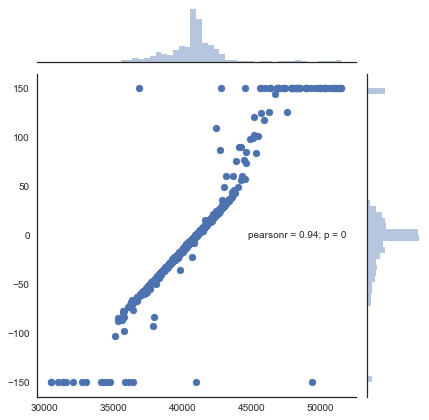

In [11]:
## TODO: Plot the rewards.


#compare the reward to the y position to ensure that reward function is correctly assesses the task 
import seaborn as sns; sns.set(style="white", color_codes=True)
g = sns.jointplot(x=np.array(results['reward']), y=np.array(results['y']))

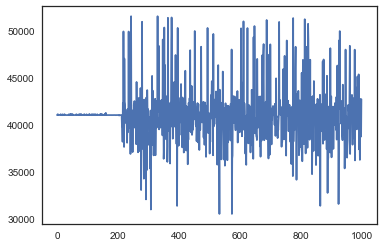

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['reward'])

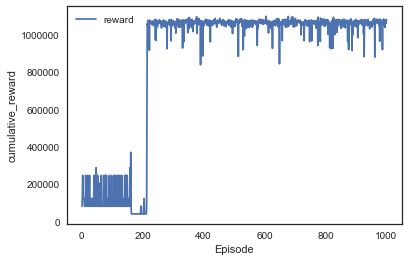

In [13]:
plt.plot(results['episode'], results['cumulative_reward'], label='reward')
plt.xlabel('Episode')
plt.ylabel('cumulative_reward')
plt.legend()
               

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I chose a takeoff task, included in takeoff_task.py, with the aim of having the agent increase its altitude fairly quickly. The reward function is relatively simple. The agent is rewarded for proximity to the target position, with a focus on the y coordinates, as a measure of altitude. I also penalized movements away from the other target coordinates (0. for everything) to decrease the likeliness of the quadcopter making unnecessary movements.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:There was a lot of testing to try to find the optimal hyperparameters,  including significantly decreasing tau and sigma. The final algorithm has gamma = 0.90, tau = 0.04. Batch size is set to 512, and exploration values are set to mu = 0.1, theta = 0.085, sigma = 0.15

I also tried increasing the size of the neural network by appending additional layers in both the actor and critic classes, and adding normalization layers. These steps were each done separately but each resulted in a reduction in the mean score. I tested ReLU and tanh activation functions. ReLU produced significantly better results.


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: 
Evaluating the cumulative rewards plot, the agent learned the task with ease. There is a very steep improvement fairly early in the process that is maintained. Final mean performance is substantially higher than the overall mean.



In [14]:
final_mean = np.mean(results['cumulative_reward'][-10:])
print('Mean reward over the last 10 episodes: ', final_mean, " compared to an overall mean of ", np.mean(results['cumulative_reward']))


Mean reward over the last 10 episodes:  1063694.4068119896  compared to an overall mean of  854737.4383399921


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
Getting started and understanding exactly what was required was certainly the most difficult part. However, it became obvious immediately that a good reward function is essential and that the hyperparameters needed to be tuned for the specific task. 
For the reward function, I had some difficulty with the funciton returning 0 when negative values were detected so the current implementation avoids negative values. 
